In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import keras as keras
import matplotlib.pyplot as plt
from sklearn import datasets, linear_model
from sklearn.metrics import classification_report,accuracy_score,f1_score, precision_score, recall_score, confusion_matrix,mean_squared_error,mean_absolute_error,precision_recall_fscore_support,precision_recall_curve, PrecisionRecallDisplay,roc_curve,auc,RocCurveDisplay
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from tensorflow.keras.layers import InputLayer
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from keras.regularizers import l2
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectFromModel, mutual_info_classif, f_classif, SelectKBest
from imblearn.over_sampling import SMOTE

In [2]:
df = pd.read_csv('/content/data.csv')
df_cd = df.copy()

#**Data exploration**

In [3]:
df.head(5)


,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,...,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,...,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1,0.020794
2,1,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,...,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,1,0.016474
3,1,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,...,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,1,0.023982
4,1,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,...,0.795016,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,1,0.035490


In [4]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6819 entries, 0 to 6818
Data columns (total 96 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Bankrupt?                                                 6819 non-null   int64  
 1    ROA(C) before interest and depreciation before interest  6819 non-null   float64
 2    ROA(A) before interest and % after tax                   6819 non-null   float64
 3    ROA(B) before interest and depreciation after tax        6819 non-null   float64
 4    Operating Gross Margin                                   6819 non-null   float64
 5    Realized Sales Gross Margin                              6819 non-null   float64
 6    Operating Profit Rate                                    6819 non-null   float64
 7    Pre-tax net Interest Rate                                6819 non-null   float64
 8    After-tax net Int

In [5]:
df.describe()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
count,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,...,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.0,6819.000000
mean,0.032263,0.505180,0.558625,0.553589,0.607948,0.607929,0.998755,0.797190,0.809084,0.303623,...,0.807760,1.862942e+07,0.623915,0.607946,0.840402,0.280365,0.027541,0.565358,1.0,0.047578
std,0.176710,0.060686,0.065620,0.061595,0.016934,0.016916,0.013010,0.012869,0.013601,0.011163,...,0.040332,3.764501e+08,0.012290,0.016934,0.014523,0.014463,0.015668,0.013214,0.0,0.050014
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000
25%,0.000000,0.476527,0.535543,0.527277,0.600445,0.600434,0.998969,0.797386,0.809312,0.303466,...,0.796750,9.036205e-04,0.623636,0.600443,0.840115,0.276944,0.026791,0.565158,1.0,0.024477
50%,0.000000,0.502706,0.559802,0.552278,0.605997,0.605976,0.999022,0.797464,0.809375,0.303525,...,0.810619,2.085213e-03,0.623879,0.605998,0.841179,0.278778,0.026808,0.565252,1.0,0.033798
75%,0.000000,0.535563,0.589157,0.584105,0.613914,0.613842,0.999095,0.797579,0.809469,0.303585,...,0.826455,5.269777e-03,0.624168,0.613913,0.842357,0.281449,0.026913,0.565725,1.0,0.052838
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,9.820000e+09,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.000000


In [6]:
df.isnull().sum()
[print(col) for col in df if df[col].isna().sum() > 0]

[]

Text(0.5, 1.0, 'Class distribution for the target feature :: Imbalanced Dataset')

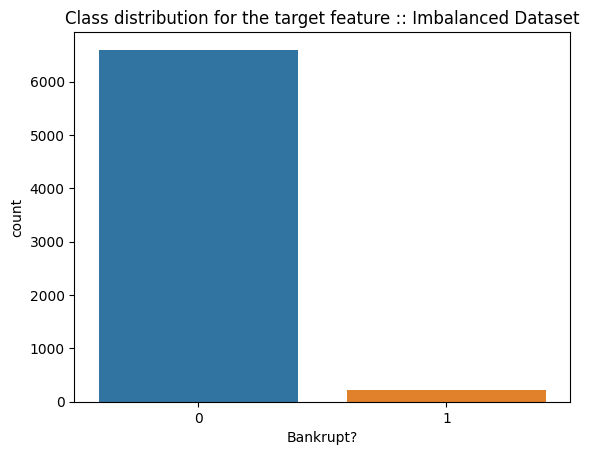

In [7]:
sns.countplot(x=df['Bankrupt?'])
plt.title('Class distribution for the target feature :: Imbalanced Dataset')

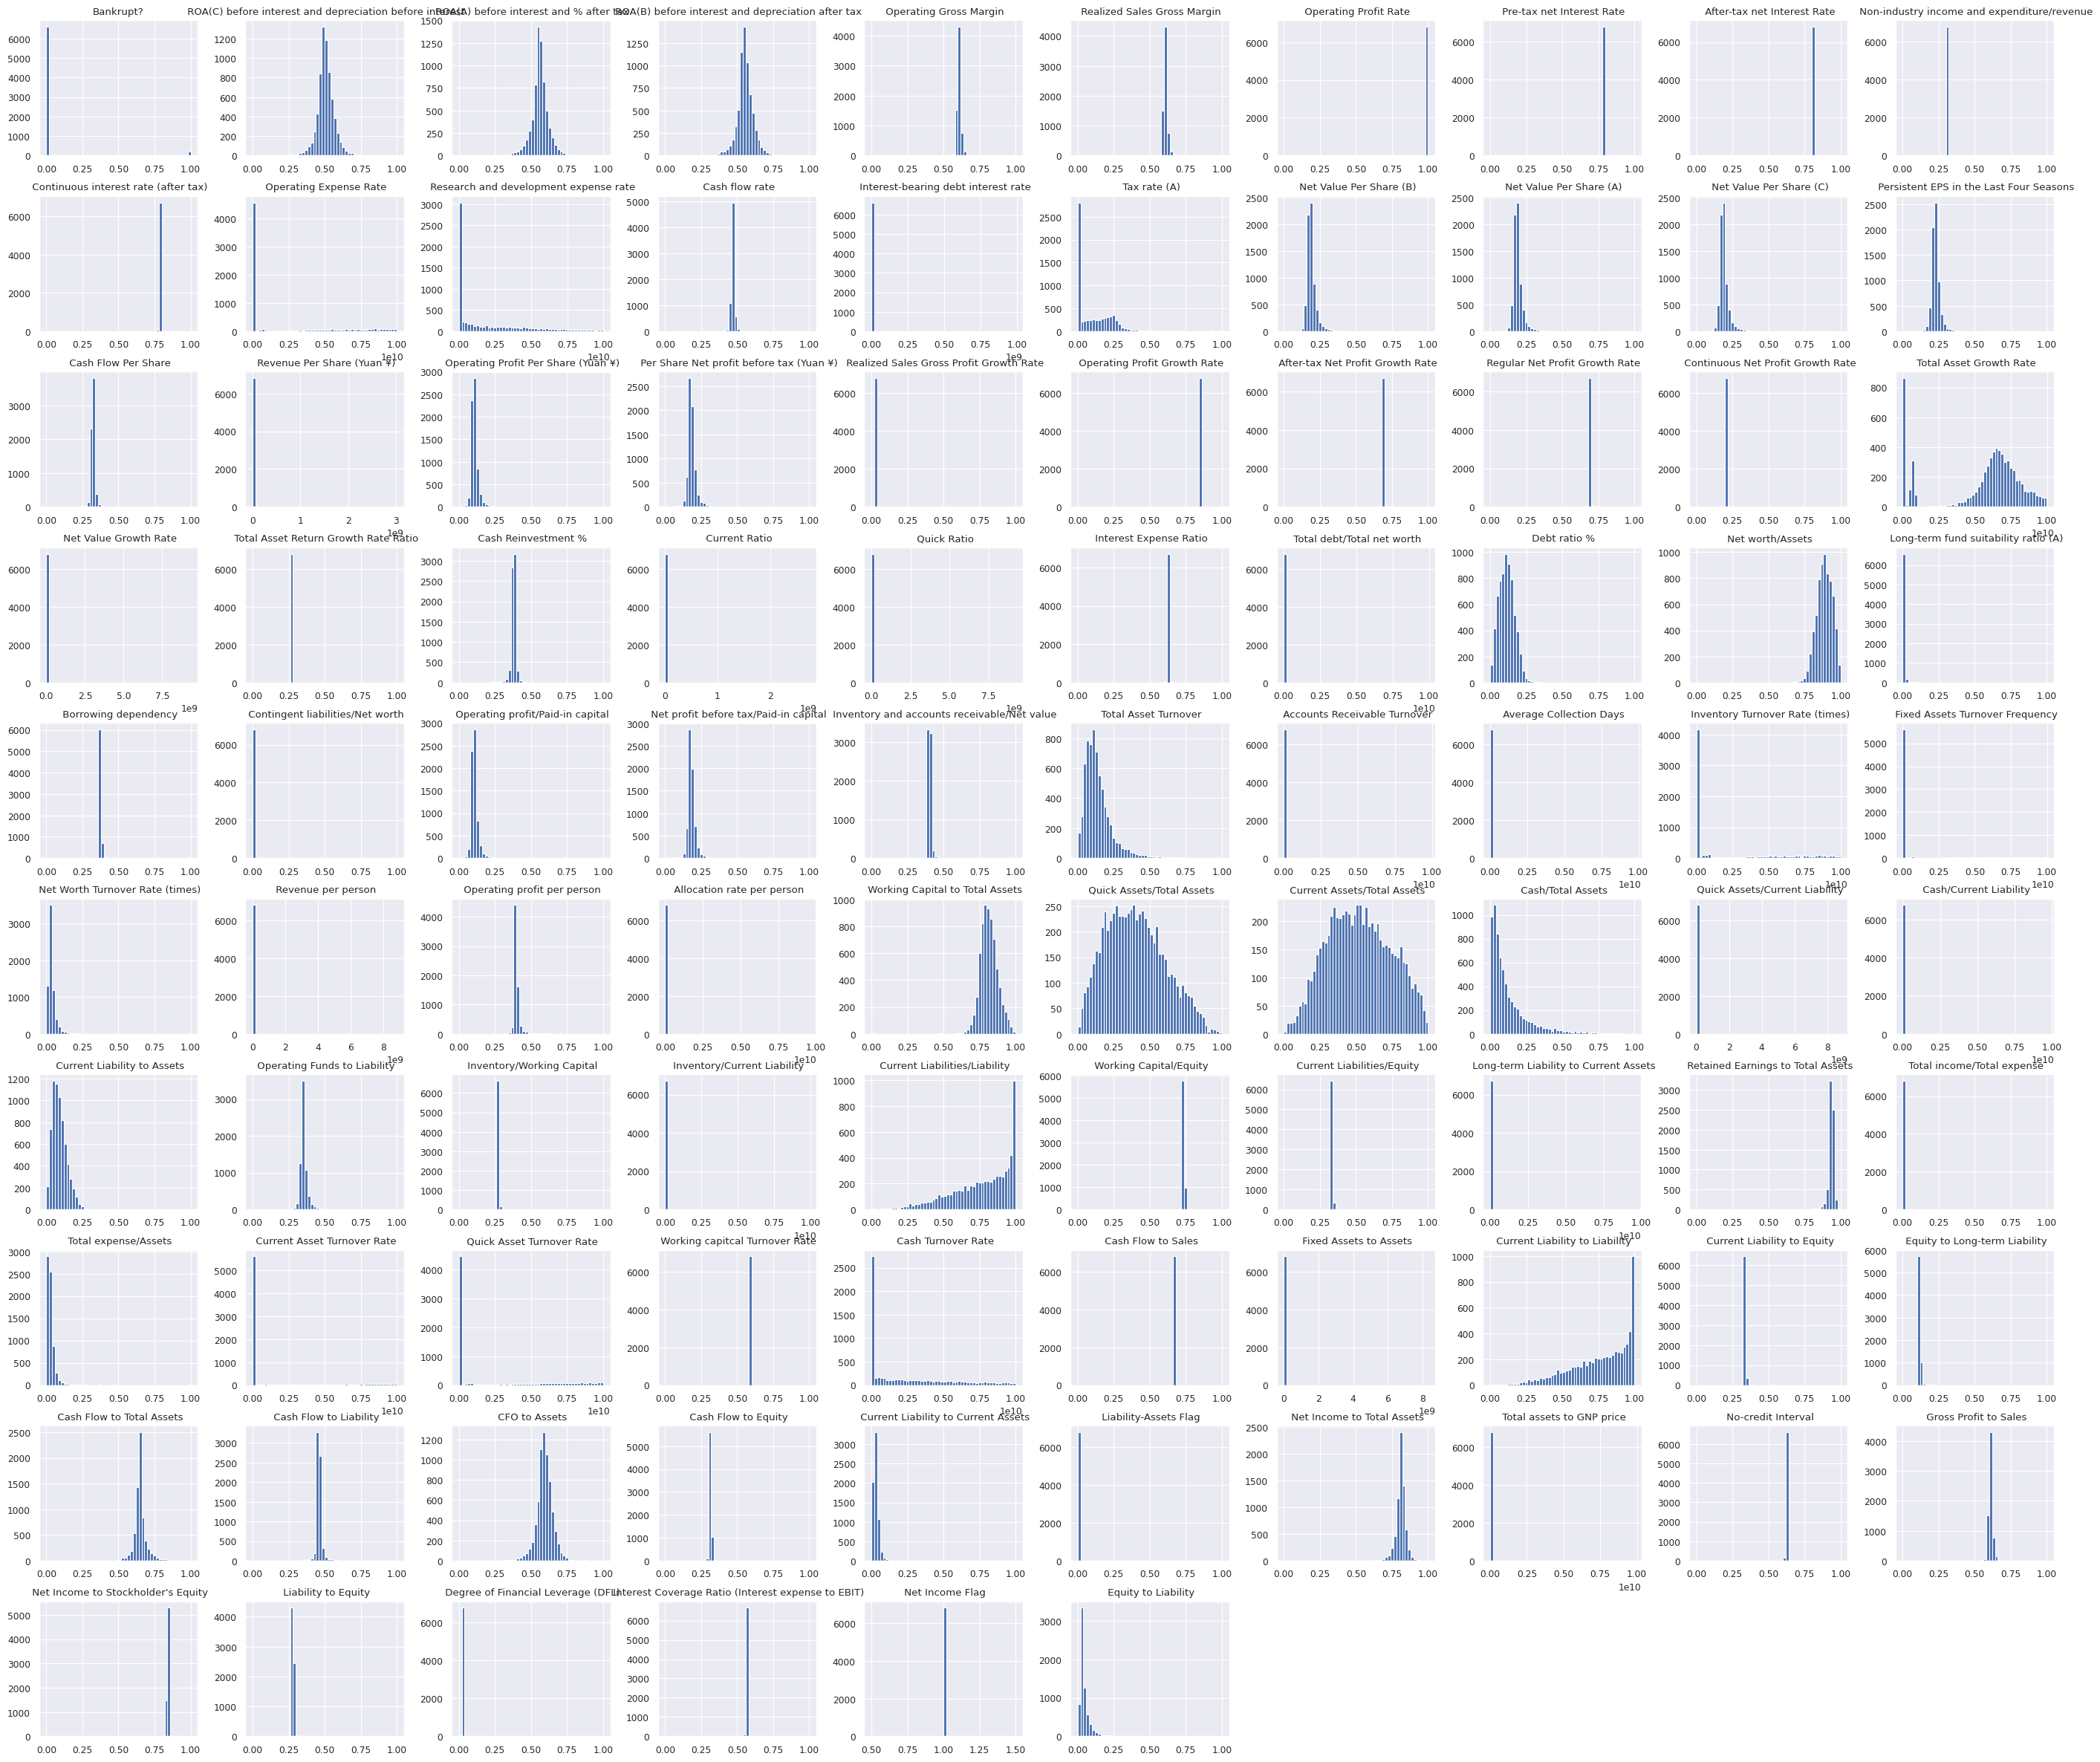

In [8]:
sns.set_theme(context = 'paper')
df.hist(figsize = (35,30), bins = 50)
plt.show()

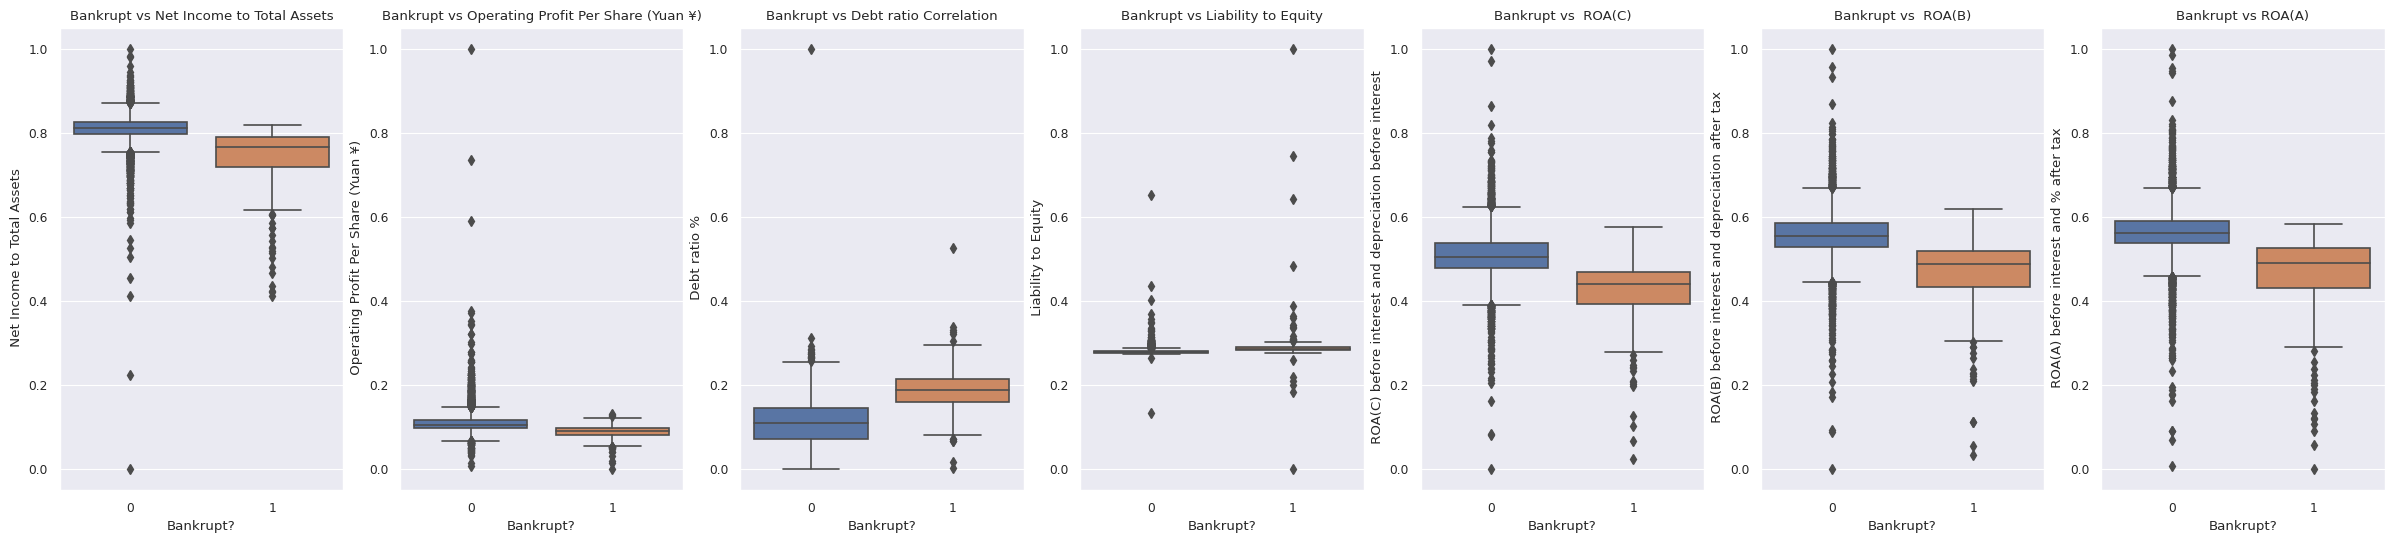

In [9]:
f, axes = plt.subplots(ncols=7, figsize=(30,6))

sns.boxplot(x='Bankrupt?', y=" Net Income to Total Assets", data=df, ax=axes[0])
axes[0].set_title('Bankrupt vs Net Income to Total Assets')

sns.boxplot(x='Bankrupt?', y=" Operating Profit Per Share (Yuan ¥)", data=df, ax=axes[1]) 
axes[1].set_title('Bankrupt vs Operating Profit Per Share (Yuan ¥)')


sns.boxplot(x='Bankrupt?', y=" Debt ratio %", data=df, ax=axes[2])
axes[2].set_title('Bankrupt vs Debt ratio Correlation')


sns.boxplot(x='Bankrupt?', y=" Liability to Equity", data=df, ax=axes[3])  
axes[3].set_title('Bankrupt vs Liability to Equity') 

sns.boxplot(x='Bankrupt?', y=" ROA(C) before interest and depreciation before interest", data=df, ax=axes[4])  
axes[4].set_title('Bankrupt vs  ROA(C)') 

sns.boxplot(x='Bankrupt?', y=" ROA(B) before interest and depreciation after tax", data=df, ax=axes[5])  
axes[5].set_title('Bankrupt vs  ROA(B)') 

sns.boxplot(x='Bankrupt?', y=" ROA(A) before interest and % after tax", data=df, ax=axes[6])  
axes[6].set_title('Bankrupt vs ROA(A)') 

plt.show()

In [10]:
X=df.drop(labels=['Bankrupt?'], axis=1)
y=df['Bankrupt?']


In [11]:
feature_selection=SelectKBest(f_classif,k=30).fit(X,y)
sel_fts=X.columns[feature_selection.get_support()]

/usr/local/lib/python3.9/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [93] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.9/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


In [12]:
print(sel_fts)

Index([' ROA(C) before interest and depreciation before interest',
       ' ROA(A) before interest and % after tax',
       ' ROA(B) before interest and depreciation after tax', ' Tax rate (A)',
       ' Net Value Per Share (B)', ' Net Value Per Share (A)',
       ' Net Value Per Share (C)', ' Persistent EPS in the Last Four Seasons',
       ' Operating Profit Per Share (Yuan ¥)',
       ' Per Share Net profit before tax (Yuan ¥)', ' Debt ratio %',
       ' Net worth/Assets', ' Borrowing dependency',
       ' Operating profit/Paid-in capital',
       ' Net profit before tax/Paid-in capital',
       ' Working Capital to Total Assets', ' Cash/Total Assets',
       ' Current Liability to Assets', ' Working Capital/Equity',
       ' Current Liabilities/Equity', ' Retained Earnings to Total Assets',
       ' Total expense/Assets', ' Current Liability to Equity',
       ' Equity to Long-term Liability', ' CFO to Assets',
       ' Current Liability to Current Assets', ' Liability-Assets Flag'

In [13]:
scaler=StandardScaler()
X_scale_ib=scaler.fit_transform(X)
X_train_ib, X_test_ib, y_train_ib, y_test_ib = train_test_split(X_scale_ib, y, train_size=0.8, shuffle=True, random_state=1, stratify=y) #imbalanced Dataset


In [14]:
Balanced_X=df[df.columns[df.columns.isin(sel_fts)]]

Text(0.5, 1.0, 'Top 30 features correlatio Matrix')

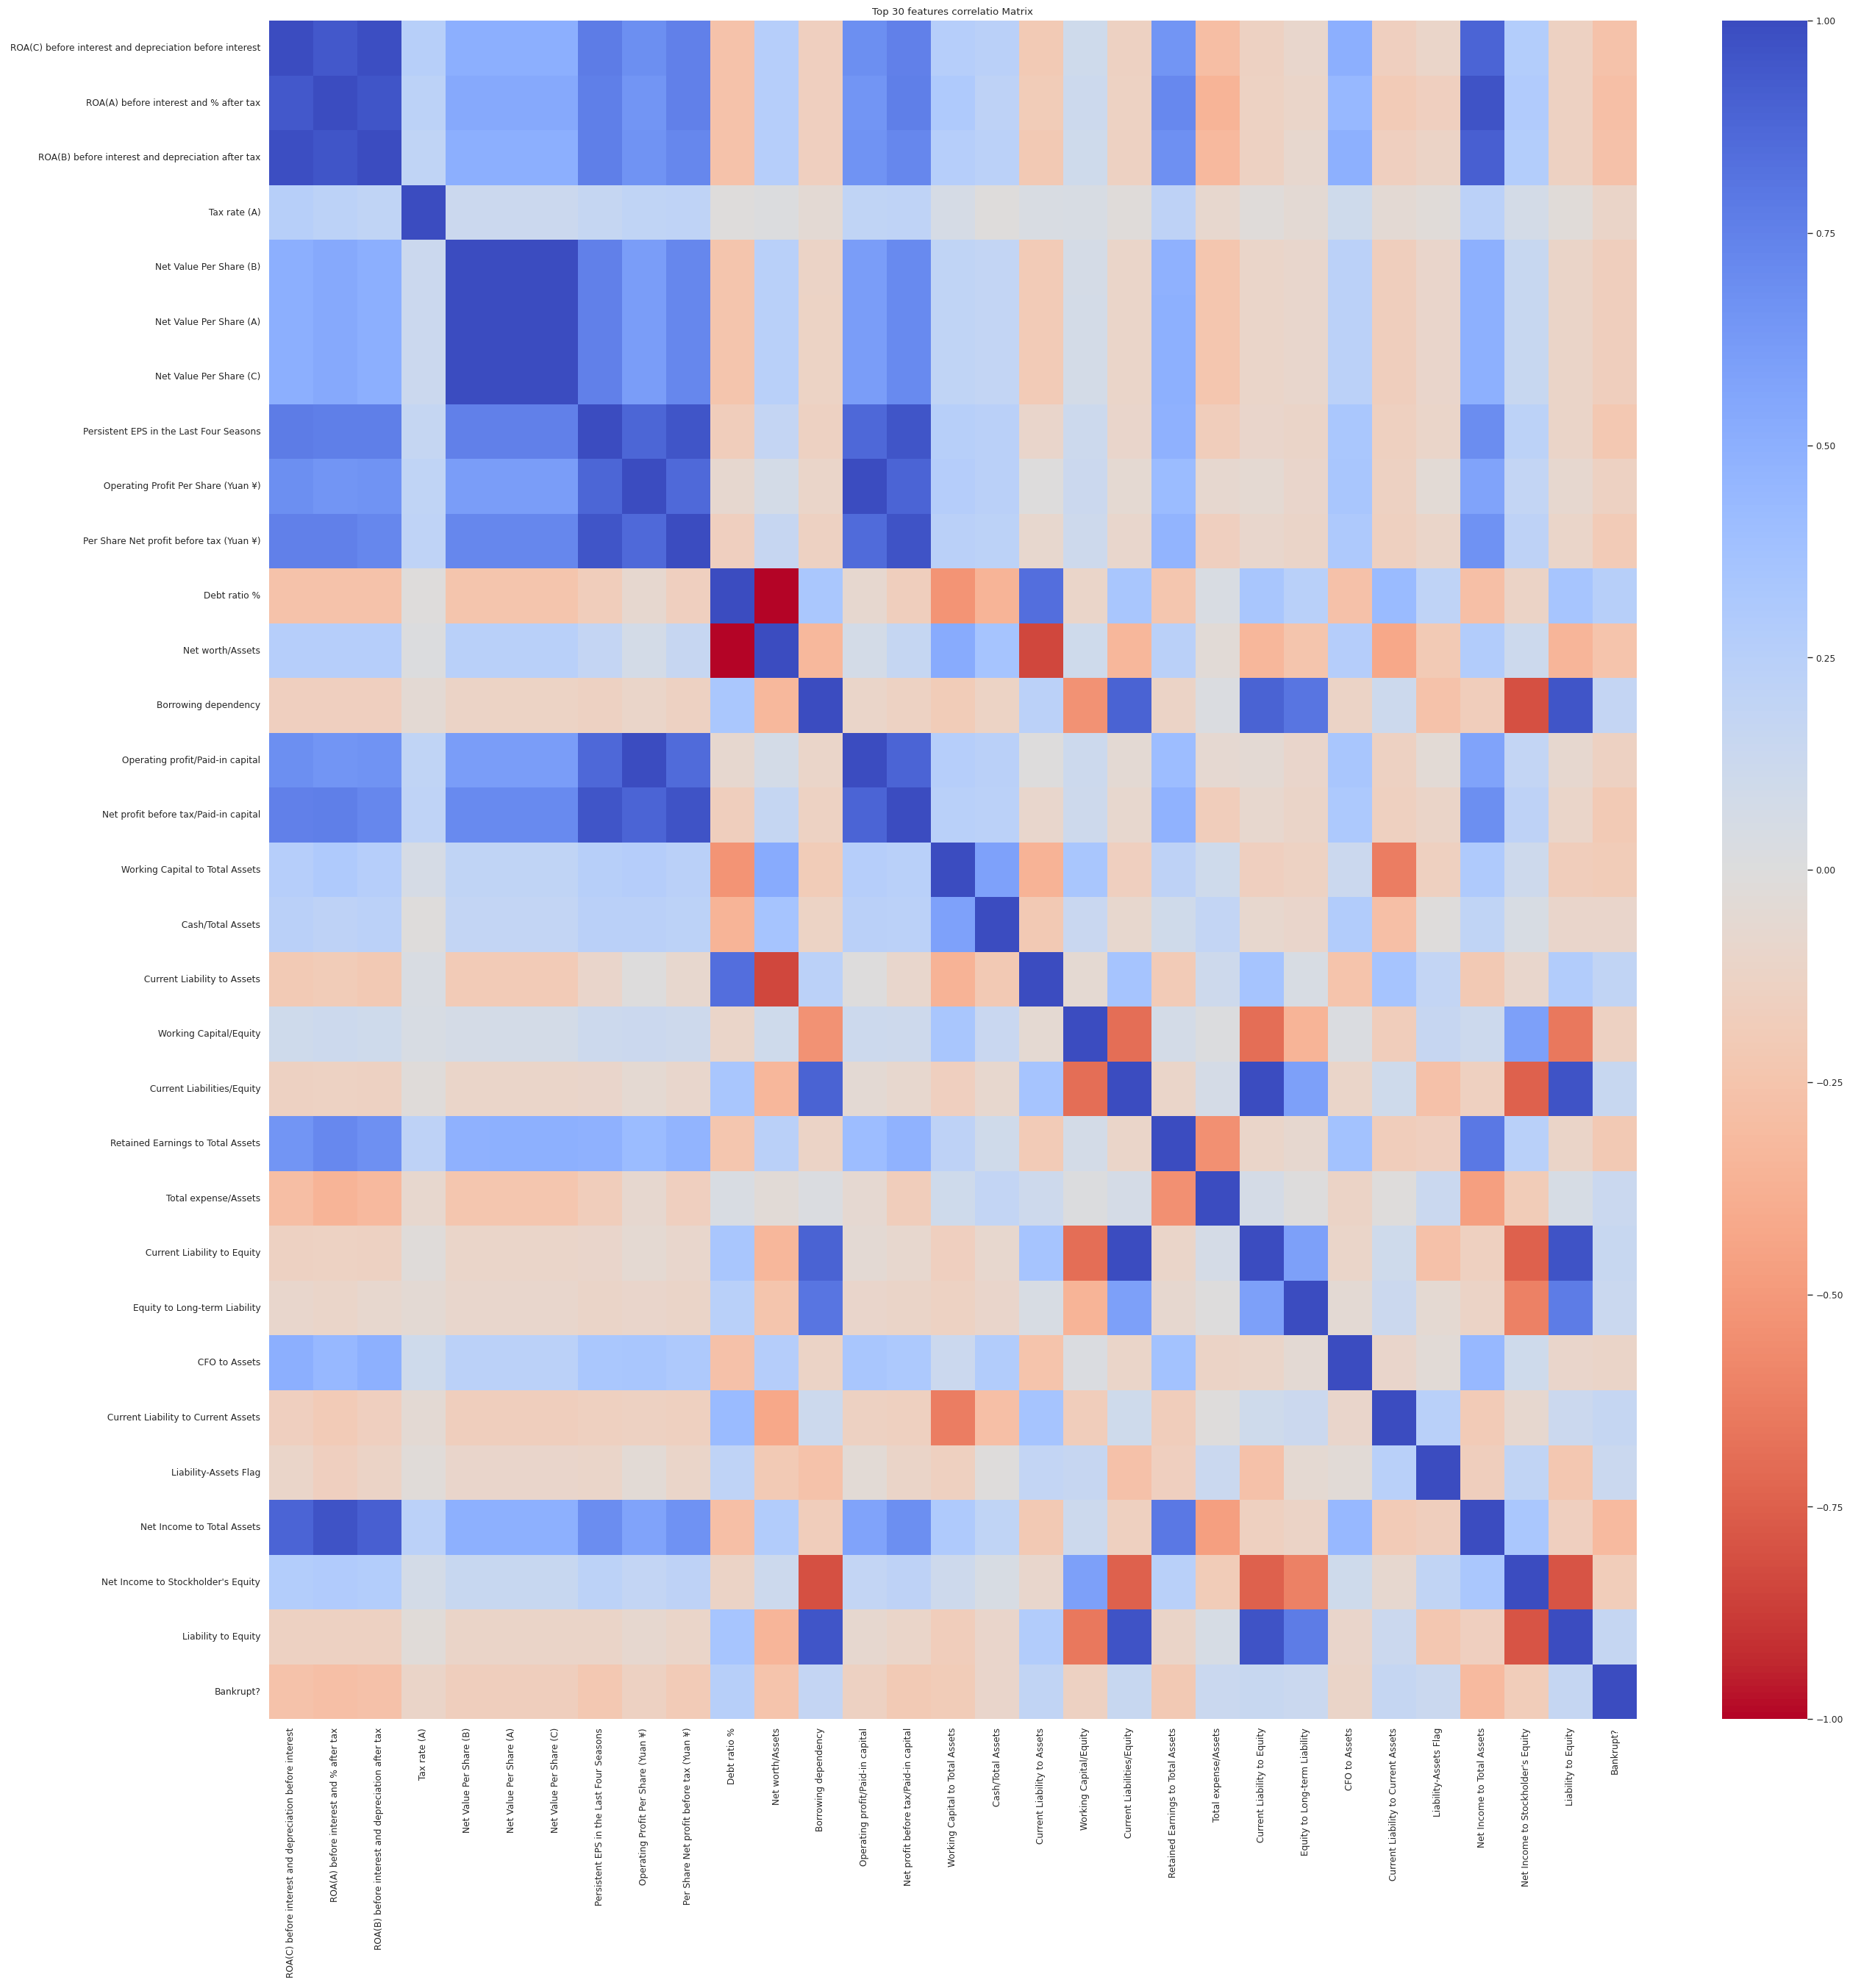

In [15]:
Bal_X = Balanced_X.copy()
Bal_X["Bankrupt?"] = df['Bankrupt?'] 
f, (ax1) = plt.subplots(1, figsize = (30,30))
corr = Bal_X.corr()
sns.heatmap(corr, cmap = 'coolwarm_r', ax= ax1)
ax1.set_title("Top 30 features correlatio Matrix")


In [16]:
oversample = SMOTE()
X,y=oversample.fit_resample(Balanced_X,y)


<Axes: xlabel='Bankrupt?', ylabel='count'>

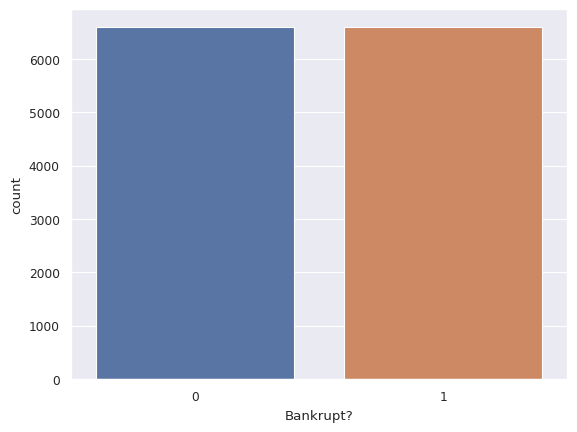

In [17]:
sns.countplot(x=y)

In [18]:
scaler=StandardScaler()
X_smote=scaler.fit_transform(X)

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X_smote, y,test_size=0.3)

#**MODELS**

Abbreviations:
1. IB- Imabalanced
2. RF- Reduced features/feature_selection


#**Logistic Regression**

1.   without SMOTE
2.   with SMOTE



##**with IB Data**

In [20]:
LR_ib=LogisticRegression(solver = "liblinear" , penalty = "l1",max_iter=1500)
LR_ib.fit(X_train_ib,y_train_ib)
y_pred_ib=LR_ib.predict(X_test_ib)
print(classification_report(y_test_ib,y_pred_ib))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1320
           1       0.39      0.16      0.23        44

    accuracy                           0.96      1364
   macro avg       0.68      0.58      0.60      1364
weighted avg       0.95      0.96      0.96      1364



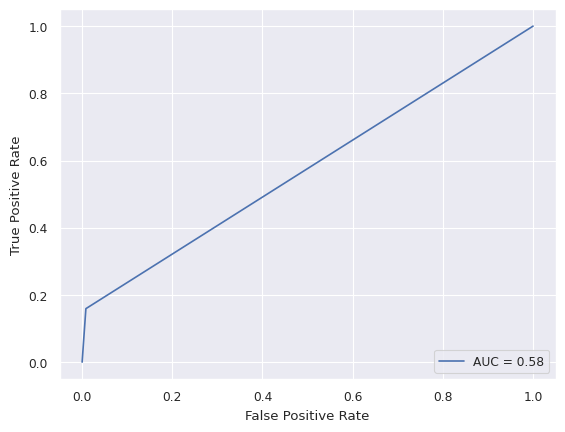

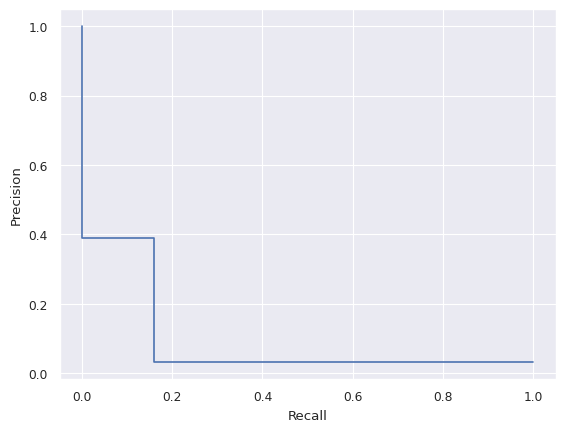

In [21]:
from sklearn.metrics import precision_recall_curve, PrecisionRecallDisplay,roc_curve,auc,RocCurveDisplay
# ROC curve
fpr_ib, tpr_ib, thresholds_ib = roc_curve(y_test_ib, y_pred_ib)
roc_auc_ib = auc(fpr_ib, tpr_ib)
roc_display_ib = RocCurveDisplay(fpr=fpr_ib, tpr=tpr_ib, roc_auc=roc_auc_ib)
roc_display_ib.plot()


# PR Curve
from sklearn.metrics import precision_recall_curve, PrecisionRecallDisplay
precision_ib,recall_ib, thresholds_ib = precision_recall_curve(y_test_ib,y_pred_ib)
pr_display_ib = PrecisionRecallDisplay(precision_ib, recall_ib)
pr_display_ib.plot()

##**with RF+SMOTE**

In [22]:
LR=LogisticRegression(max_iter=1500)
LR.fit(X_train,y_train)

LogisticRegression(max_iter=1500)

In [23]:
y_pred=LR.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.89      0.88      0.89      1938
           1       0.89      0.90      0.89      2022

    accuracy                           0.89      3960
   macro avg       0.89      0.89      0.89      3960
weighted avg       0.89      0.89      0.89      3960



In [24]:
y_pred[y_pred > 0.5] = 1
y_pred[y_pred <= 0.5] = 0

print(y_pred.shape)
print(y_test.shape)

# Print f1, precision, and recall scores
print("precision:", precision_score(y_test, y_pred , average="macro"))
print("Recall:", recall_score(y_test, y_pred , average="macro"))
print("F1_score:", f1_score(y_test, y_pred , average="macro"))

(3960,)
(3960,)
precision: 0.8909899888765295
Recall: 0.8907313667306684
F1_score: 0.8908278885121164


In [25]:
mse = mean_squared_error(y_test,y_pred)
print("Mean Squared Error: {}".format(mse))

## R2 score for training and testing
r2_train = LR.score(X_train,y_train)
r2_test = LR.score(X_test,y_test)
print("R² Score of linear regressor on training set: {}".format(r2_train))
print("R² Score of linear regressor on test set: {}".format(r2_test))

Mean Squared Error: 0.10909090909090909
R² Score of linear regressor on training set: 0.884065815111496
R² Score of linear regressor on test set: 0.8909090909090909


In [26]:
print(LR.coef_)

[[-2.09104509  3.37315064  0.51798847  0.05333995 -2.2391566   0.72325575
   1.31778733 -3.07142503  0.88136641  0.65532057  0.61554362 -0.61554362
   3.26023512  0.30658336 -0.20829632  0.24220329 -0.58933414  0.53622583
  -2.90737651 -1.59584329 -0.12400983 -0.49854315 -1.59584329  0.66306235
  -0.13425063 -0.31405181  0.523932   -3.60087199  0.27670768 -2.24411486]]


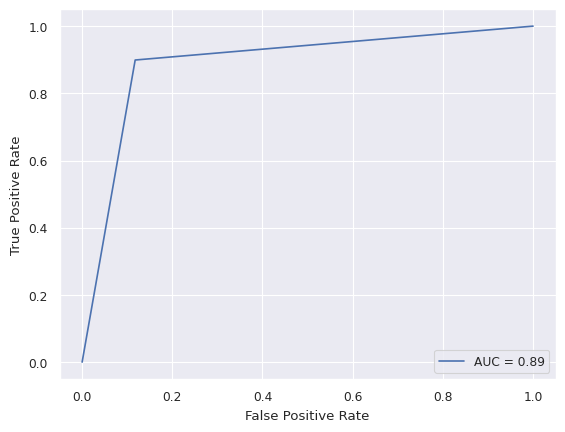

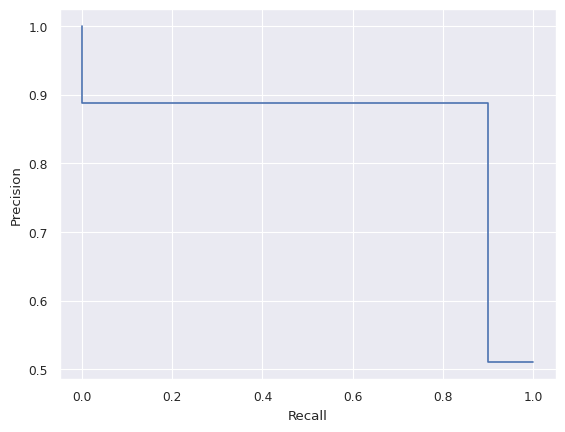

In [27]:
from sklearn.metrics import precision_recall_curve, PrecisionRecallDisplay,roc_curve,auc,RocCurveDisplay
# ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc)
roc_display.plot()


# PR Curve
from sklearn.metrics import precision_recall_curve, PrecisionRecallDisplay
precision,recall, thresholds = precision_recall_curve(y_test,y_pred)
pr_display = PrecisionRecallDisplay(precision, recall)
pr_display.plot()

#**Polynomial Regression**

1. without SMOTE
2. with SMOTE

##**with IB Data**

In [28]:
poly_ib = PolynomialFeatures(degree = 3, interaction_only=False, include_bias=False)
X_poly_ib = poly_ib.fit_transform(X_train_ib)
X_poly_ib.shape

(5455, 152095)

In [29]:
# pr_ib = LogisticRegression(penalty='l2',max_iter=2000)
# pr_ib.fit(X_poly_ib,y_train_ib)

In [30]:
# X_test_poly_ib = poly_ib.fit_transform(X_test_ib)
# y_pred_poly_ib=pr_ib.predict(X_test_poly_ib)

# y_pred_poly_ib[y_pred_poly_ib > 0.5] = 1
# y_pred_poly_ib[y_pred_poly_ib <= 0.5] = 0

# print(y_pred_poly_ib.shape)
# print(y_test_ib.shape)

# # Print f1, precision, and recall scores
# print("precision:", precision_score(y_test_ib, y_pred_poly_ib , average="macro"))
# print("Recall:", recall_score(y_test_ib, y_pred_poly_ib , average="macro"))
# print("F1_score:", f1_score(y_test_ib, y_pred_poly_ib , average="macro"))

In [31]:
# mse_ib = mean_squared_error(y_test_ib,y_pred_poly_ib)
# print("Mean Squared Error: {}".format(mse_ib))

# ## R2 score for training and testing
# r2_train_ib = log_reg.score(X_train_ib,y_train_ib)
# r2_test_ib = log_reg.score(X_test_ib,y_test_ib)
# print("R² Score of linear regressor on training set: {}".format(r2_train_ib))
# print("R² Score of linear regressor on test set: {}".format(r2_test_ib))

In [32]:
# fpr_poly_ib, tpr_poly_ib, thresholds_poly_ib = roc_curve(y_test_ib, y_pred_poly_ib)
# roc_auc_poly_ib = auc(fpr_poly_ib, tpr_poly_ib)
# roc_display_poly_ib = RocCurveDisplay(fpr=fpr_poly_ib, tpr=tpr_poly_ib, roc_auc=roc_auc_poly_ib)
# roc_display_poly_ib.plot()

# precision_poly_ib,recall_poly_ib, thresholds_poly_ib = precision_recall_curve(y_test_ib,y_pred_poly_ib)
# pr_display_poly_ib = PrecisionRecallDisplay(precision_poly_ib, recall_poly_ib)
# pr_display_poly_ib.plot()

##**with RF+SMOTE**

In [33]:
poly = PolynomialFeatures(degree = 3, interaction_only=False, include_bias=False)
X_poly = poly.fit_transform(X_train)
X_poly.shape

(9238, 5455)

In [34]:
pr = LogisticRegression(penalty='l2',max_iter=2000)
pr.fit(X_poly,y_train)

LogisticRegression(max_iter=2000)

In [35]:
X_test_poly = poly.fit_transform(X_test)
y_pred_poly=pr.predict(X_test_poly)

In [36]:
y_pred_poly[y_pred_poly > 0.5] = 1
y_pred_poly[y_pred_poly <= 0.5] = 0

print(y_pred_poly.shape)
print(y_test.shape)

# Print f1, precision, and recall scores
print("precision:", precision_score(y_test, y_pred_poly , average="macro"))
print("Recall:", recall_score(y_test, y_pred_poly , average="macro"))
print("F1_score:", f1_score(y_test, y_pred_poly , average="macro"))

(3960,)
(3960,)
precision: 0.9681153203449623
Recall: 0.9664595027453431
F1_score: 0.9668602544150713


In [37]:
mse = mean_squared_error(y_test,y_pred_poly)
print("Mean Squared Error: {}".format(mse))

## R2 score for training and testing
r2_train = LR.score(X_train,y_train)
r2_test = LR.score(X_test,y_test)
print("R² Score of linear regressor on training set: {}".format(r2_train))
print("R² Score of linear regressor on test set: {}".format(r2_test))

Mean Squared Error: 0.03308080808080808
R² Score of linear regressor on training set: 0.884065815111496
R² Score of linear regressor on test set: 0.8909090909090909


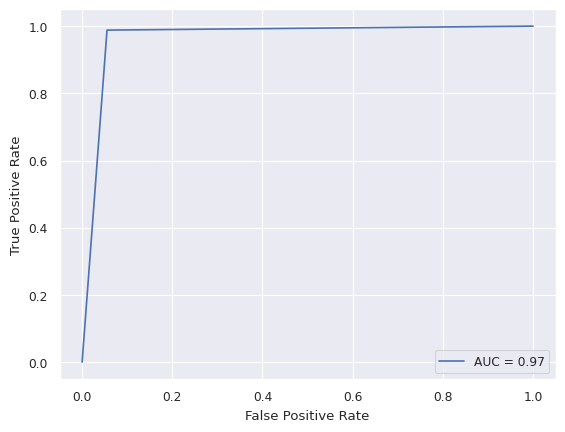

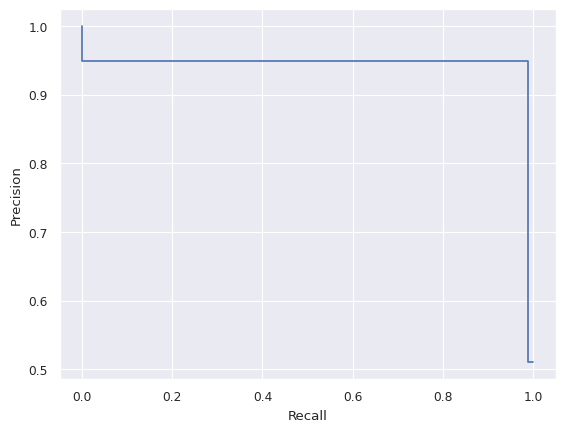

In [38]:
fpr_poly, tpr_poly, thresholds_poly = roc_curve(y_test, y_pred_poly)
roc_auc_poly = auc(fpr_poly, tpr_poly)
roc_display_poly = RocCurveDisplay(fpr=fpr_poly, tpr=tpr_poly, roc_auc=roc_auc_poly)
roc_display_poly.plot()


# PR Curve
from sklearn.metrics import precision_recall_curve, PrecisionRecallDisplay
precision_poly,recall_poly, thresholds_poly = precision_recall_curve(y_test,y_pred_poly)
pr_display_poly = PrecisionRecallDisplay(precision_poly, recall_poly)
pr_display_poly.plot()

#**Decision Trees**

##**with IB Data**

              precision    recall  f1-score   support

           0       0.98      0.98      0.98      1320
           1       0.31      0.25      0.28        44

    accuracy                           0.96      1364
   macro avg       0.64      0.62      0.63      1364
weighted avg       0.95      0.96      0.96      1364



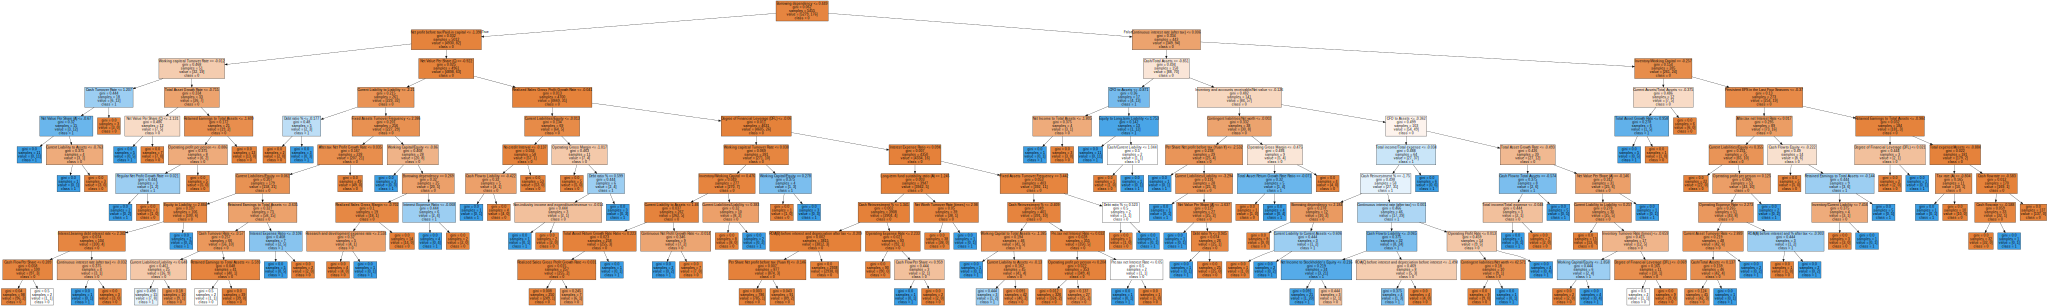

In [39]:
from sklearn import tree
X_DT=df.drop(labels=['Bankrupt?'], axis=1)
y_DT=df['Bankrupt?']
DT_ib = tree.DecisionTreeClassifier(criterion='gini',max_depth=10,max_features=11,random_state=42)
DT_ib = DT_ib.fit(X_train_ib, y_train_ib)
y_pred_DT_ib=DT_ib.predict(X_test_ib)
print(classification_report(y_test_ib,y_pred_DT_ib))
y_class_names=["0","1"]
sel_fts.shape
X_col_names = list(X_DT.columns)
import graphviz
# DOT data
CBD_data_ib = tree.export_graphviz(DT_ib, out_file=None, 
                                feature_names=X_col_names,  
                                class_names=y_class_names,
                                filled=True)

# Draw graph
graph_ib = graphviz.Source(CBD_data_ib, format="png") 
graph_ib

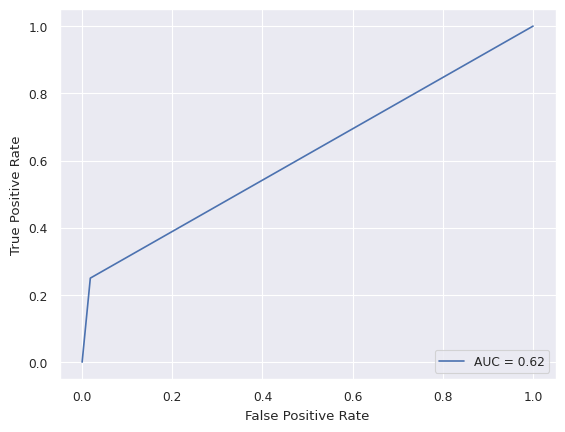

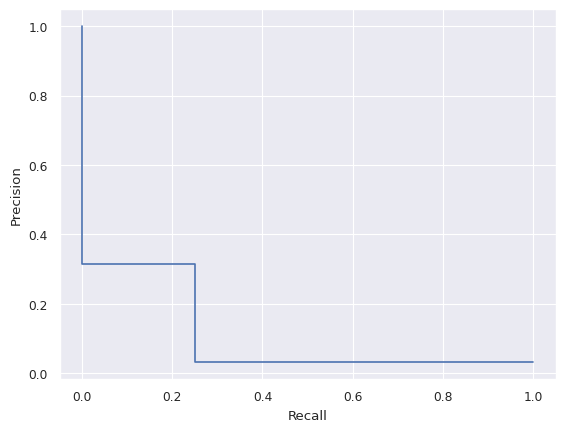

In [40]:
fpr_dt_ib, tpr_dt_ib, thresholds_dt_ib = roc_curve(y_test_ib, y_pred_DT_ib)
roc_auc_dt_ib = auc(fpr_dt_ib, tpr_dt_ib)
roc_display_dt_ib = RocCurveDisplay(fpr=fpr_dt_ib, tpr=tpr_dt_ib, roc_auc=roc_auc_dt_ib)
roc_display_dt_ib.plot()


# PR Curve
from sklearn.metrics import precision_recall_curve, PrecisionRecallDisplay
precision_dt_ib,recall_dt_ib, thresholds_dt_ib = precision_recall_curve(y_test_ib,y_pred_DT_ib)
pr_display_dt_ib = PrecisionRecallDisplay(precision_dt_ib, recall_dt_ib)
pr_display_dt_ib.plot()

##**with RF+SMOTE**

              precision    recall  f1-score   support

           0       0.96      0.91      0.93      1938
           1       0.91      0.97      0.94      2022

    accuracy                           0.94      3960
   macro avg       0.94      0.94      0.94      3960
weighted avg       0.94      0.94      0.94      3960



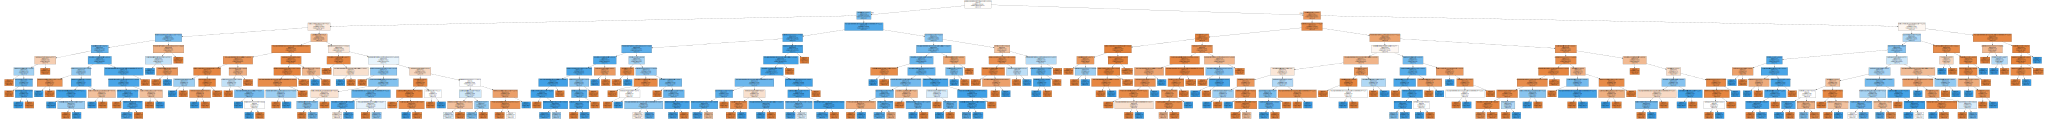

In [41]:
from sklearn import tree
DT = tree.DecisionTreeClassifier(criterion='gini',max_depth=10,max_features=11,random_state=42)
DT = DT.fit(X_train, y_train)
y_pred_DT=DT.predict(X_test)
print(classification_report(y_test,y_pred_DT))
y_class_names=["0","1"]
sel_fts.shape
X_col_names = list(df.columns[df.columns.isin(sel_fts)])
import graphviz
# DOT data
CBD_data = tree.export_graphviz(DT, out_file=None, 
                                feature_names=X_col_names,  
                                class_names=y_class_names,
                                filled=True)

# Draw graph
graph = graphviz.Source(CBD_data, format="png") 
graph

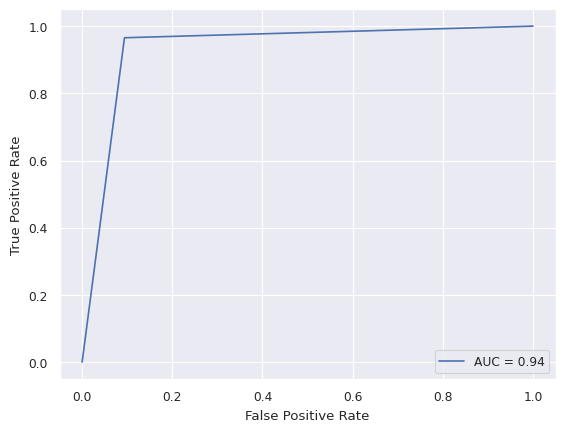

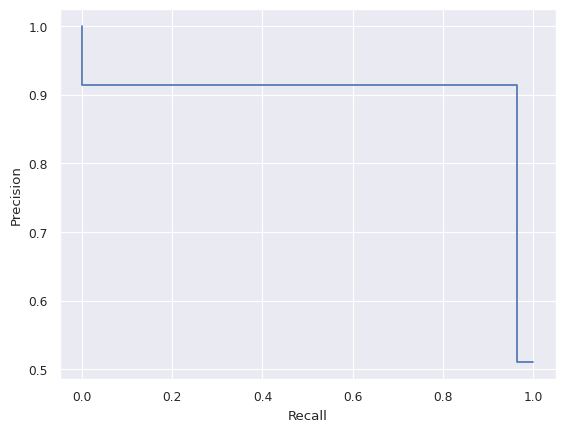

In [42]:
fpr_dt, tpr_dt, thresholds_dt = roc_curve(y_test, y_pred_DT)
roc_auc_dt = auc(fpr_dt, tpr_dt)
roc_display_dt = RocCurveDisplay(fpr=fpr_dt, tpr=tpr_dt, roc_auc=roc_auc_dt)
roc_display_dt.plot()


# PR Curve
from sklearn.metrics import precision_recall_curve, PrecisionRecallDisplay
precision_dt,recall_dt, thresholds_dt = precision_recall_curve(y_test,y_pred_DT)
pr_display_dt = PrecisionRecallDisplay(precision_dt, recall_dt)
pr_display_dt.plot()

#**Neural Network**

##**with weighted NN IB Data**

In [43]:
CBP_NN_IB = Sequential([InputLayer(input_shape=(X_train_ib.shape[1])),
                     Dense(64,activation="relu"),
                     Dense(1,activation="sigmoid")
                     ])

CBP_NN_IB.compile(optimizer="Adam",
                loss = "BinaryCrossentropy",
                metrics = "Accuracy")

CBP_NN_IB.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                6144      
                                                                 
 dense_1 (Dense)             (None, 1)                 65        
                                                                 
Total params: 6,209
Trainable params: 6,209
Non-trainable params: 0
_________________________________________________________________


In [44]:
weights = {0:1, 1:2000}
history = CBP_NN_IB.fit(X_train_ib, y_train_ib, epochs=70,class_weight=weights)


Epoch 1/70
171/171 [==============================] - 3s 5ms/step - loss: 11.9134 - Accuracy: 0.3764
Epoch 2/70
171/171 [==============================] - 1s 4ms/step - loss: 3.5179 - Accuracy: 0.3263
Epoch 3/70
171/171 [==============================] - 1s 3ms/step - loss: 2.8605 - Accuracy: 0.3190
Epoch 4/70
171/171 [==============================] - 1s 3ms/step - loss: 2.6826 - Accuracy: 0.3206
Epoch 5/70
171/171 [==============================] - 1s 3ms/step - loss: 2.5526 - Accuracy: 0.3360
Epoch 6/70
171/171 [==============================] - 1s 3ms/step - loss: 2.4332 - Accuracy: 0.3659
Epoch 7/70
171/171 [==============================] - 1s 3ms/step - loss: 2.3175 - Accuracy: 0.3826
Epoch 8/70
171/171 [==============================] - 1s 3ms/step - loss: 2.2158 - Accuracy: 0.4178
Epoch 9/70
171/171 [==============================] - 1s 3ms/step - loss: 2.1221 - Accuracy: 0.4471
Epoch 10/70
171/171 [==============================] - 1s 3ms/step - loss: 2.0273 - Accuracy: 0.471

In [45]:
y_pred_NN_IB=CBP_NN_IB.predict(X_test_ib)
# print(y_pred1.shape)
y_pred_NN_IB[y_pred_NN_IB > 0.5] = 1
y_pred_NN_IB[y_pred_NN_IB <= 0.5] = 0
#

# Print f1, precision, and recall scores
print("precision:", precision_score(y_test_ib, y_pred_NN_IB , average="macro"))
print("Recall:", recall_score(y_test_ib, y_pred_NN_IB , average="macro"))
print("F1_score:", f1_score(y_test_ib, y_pred_NN_IB , average="macro"))

43/43 [==============================] - 0s 1ms/step
precision: 0.5961596800455663
Recall: 0.7674242424242425
F1_score: 0.6305881036315819


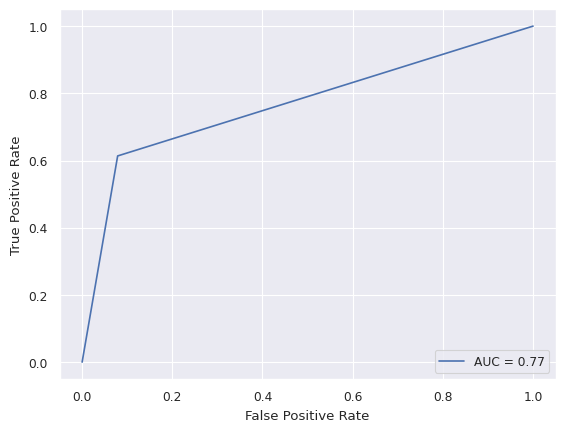

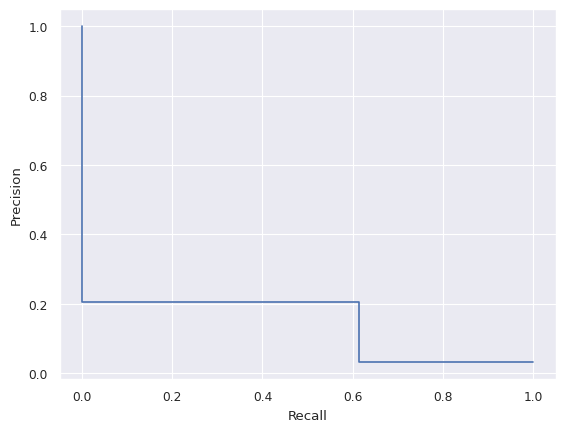

In [46]:
from sklearn.metrics import precision_recall_curve, PrecisionRecallDisplay,roc_curve,auc,RocCurveDisplay
# ROC curve
fpr_NN_IB, tpr_NN_IB, thresholds_NN_IB = roc_curve(y_test_ib, y_pred_NN_IB)
roc_auc_NN_IB = auc(fpr_NN_IB, tpr_NN_IB)
roc_display_NN_IB = RocCurveDisplay(fpr=fpr_NN_IB, tpr=tpr_NN_IB, roc_auc=roc_auc_NN_IB)
roc_display_NN_IB.plot()


# PR Curve
from sklearn.metrics import precision_recall_curve, PrecisionRecallDisplay
precision_NN_IB,recall_NN_IB, thresholds_NN_IB = precision_recall_curve(y_test_ib,y_pred_NN_IB)
pr_display_NN_IB = PrecisionRecallDisplay(precision_NN_IB, recall_NN_IB)
pr_display_NN_IB.plot()

##**with RF+SMOTE**

In [47]:
CBP_NN = Sequential([keras.Input(shape=(X_train.shape[1])),
                     Dense(64,activation="relu"),
                     Dense(20,activation="relu"),
                     Dense(1,activation="sigmoid")
                     ])

CBP_NN.compile(optimizer="Adam",
                loss = "BinaryCrossentropy",
                metrics = "Accuracy")

CBP_NN.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 64)                1984      
                                                                 
 dense_3 (Dense)             (None, 20)                1300      
                                                                 
 dense_4 (Dense)             (None, 1)                 21        
                                                                 
Total params: 3,305
Trainable params: 3,305
Non-trainable params: 0
_________________________________________________________________


In [48]:
history = CBP_NN.fit(X_train, y_train, epochs=30)

Epoch 1/30
289/289 [==============================] - 2s 3ms/step - loss: 0.3287 - Accuracy: 0.8632
Epoch 2/30
289/289 [==============================] - 1s 3ms/step - loss: 0.2654 - Accuracy: 0.8868
Epoch 3/30
289/289 [==============================] - 1s 3ms/step - loss: 0.2440 - Accuracy: 0.8963
Epoch 4/30
289/289 [==============================] - 1s 3ms/step - loss: 0.2260 - Accuracy: 0.9052
Epoch 5/30
289/289 [==============================] - 1s 3ms/step - loss: 0.2084 - Accuracy: 0.9164
Epoch 6/30
289/289 [==============================] - 1s 5ms/step - loss: 0.1953 - Accuracy: 0.9218
Epoch 7/30
289/289 [==============================] - 1s 4ms/step - loss: 0.1825 - Accuracy: 0.9316
Epoch 8/30
289/289 [==============================] - 1s 3ms/step - loss: 0.1693 - Accuracy: 0.9379
Epoch 9/30
289/289 [==============================] - 1s 3ms/step - loss: 0.1584 - Accuracy: 0.9435
Epoch 10/30
289/289 [==============================] - 1s 3ms/step - loss: 0.1500 - Accuracy: 0.9471

In [49]:
y_pred_NN=CBP_NN.predict(X_test)

124/124 [==============================] - 0s 1ms/step


In [50]:
# print(y_pred1.shape)
y_pred_NN[y_pred_NN > 0.5] = 1
y_pred_NN[y_pred_NN <= 0.5] = 0
#

# Print f1, precision, and recall scores
print("precision:", precision_score(y_test, y_pred_NN , average="macro"))
print("Recall:", recall_score(y_test, y_pred_NN , average="macro"))
print("F1_score:", f1_score(y_test, y_pred_NN , average="macro"))

precision: 0.9797692411497458
Recall: 0.9790370935192756
F1_score: 0.9792705892867402


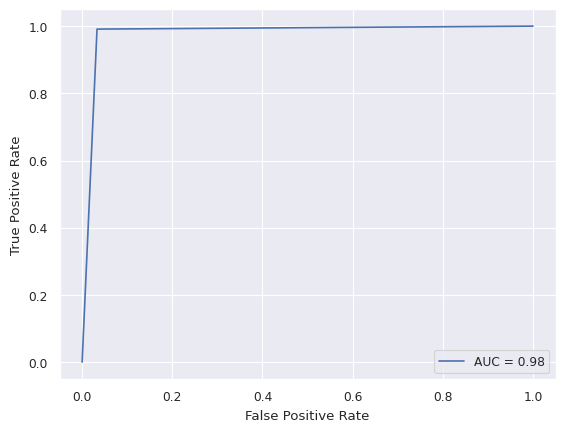

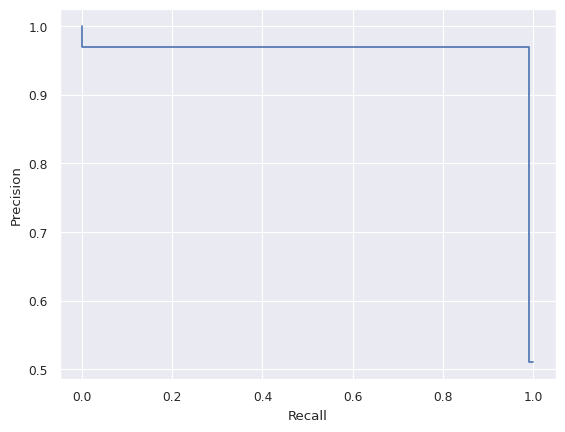

In [51]:

# ROC curve
fpr_NN, tpr_NN, thresholds_NN = roc_curve(y_test, y_pred_NN)
roc_auc_NN = auc(fpr_NN, tpr_NN)
roc_display_NN = RocCurveDisplay(fpr=fpr_NN, tpr=tpr_NN, roc_auc=roc_auc_NN)
roc_display_NN.plot()


# PR Curve
from sklearn.metrics import precision_recall_curve, PrecisionRecallDisplay
precision_NN,recall_NN, thresholds_NN = precision_recall_curve(y_test,y_pred_NN)
pr_display = PrecisionRecallDisplay(precision_NN, recall_NN)
pr_display.plot()


#**PCA**

##**wighted NN + IB data**

In [52]:
n_components = 95
pca95pc = PCA(n_components)
pca95pc.fit(X_train_ib)

PCA(n_components=95)

Text(0, 0.5, 'Explained variance')

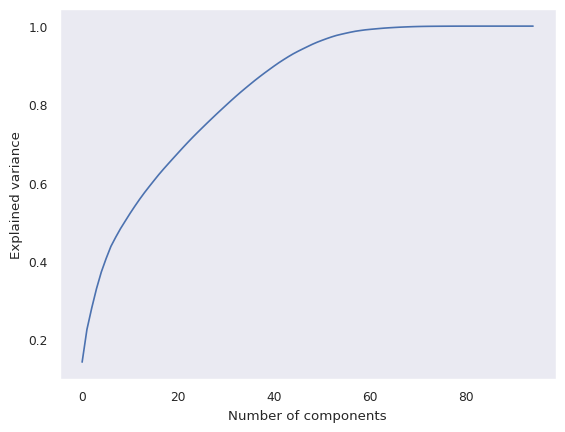

In [53]:
plt.grid()
plt.plot(np.cumsum(pca95pc.explained_variance_ratio_))
plt.xlabel('Number of components')
plt.ylabel('Explained variance')

In [54]:
pca_90_ib = PCA(n_components = 0.95)
pca_90_ib.fit(X_train_ib)
print("Cumulative Variances (Percentage):")
print(np.cumsum(pca_90_ib.explained_variance_ratio_ * 100))
components_ib = len(pca_90_ib.explained_variance_ratio_)
print(f'Number of components: {components_ib}')

Cumulative Variances (Percentage):
[14.26545201 22.58944748 28.06165865 33.02224124 37.26280135 40.69005632
 43.7978533  46.13647021 48.32297795 50.28406575 52.23076061 54.07224143
 55.84230033 57.51594883 59.08650137 60.6249467  62.14414058 63.56717408
 64.93957276 66.29695375 67.64106231 68.98276679 70.29116768 71.56792339
 72.79807901 74.00252361 75.19813149 76.37284457 77.53834546 78.67880907
 79.80792313 80.93185376 82.02756319 83.09379836 84.12343387 85.13157478
 86.13031768 87.08646266 88.0132679  88.90927895 89.79527161 90.6487154
 91.44423477 92.20805604 92.92831903 93.57670701 94.18422361 94.7804247
 95.36758258]
Number of components: 49


In [55]:
num_pca_modes_ib =49
pca_pc_ib = PCA(n_components=num_pca_modes_ib)
pca_pc_ib.fit(X_train_ib)

#pca90pc_comp  = abs(pca90pc.components_)
#print(pca90pc_comp)

X_train_red_ib = pca_pc_ib.transform(X_train_ib)

print("Train images shape:", X_train_red_ib.shape)

Train images shape: (5455, 49)


In [56]:
CBP_PCA_ib = Sequential([keras.Input(shape=(num_pca_modes_ib)),
                     Dense(64,activation="relu"),
                 #   Dense(30,activation="relu"),
                     Dense(20,activation="relu"),
                     Dense(1,activation="sigmoid")
                     ])

CBP_PCA_ib.compile(optimizer="Adam",
                loss = "BinaryCrossentropy",
                metrics = "Accuracy")

CBP_PCA_ib.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 64)                3200      
                                                                 
 dense_6 (Dense)             (None, 20)                1300      
                                                                 
 dense_7 (Dense)             (None, 1)                 21        
                                                                 
Total params: 4,521
Trainable params: 4,521
Non-trainable params: 0
_________________________________________________________________


In [57]:
weights_pca = {0:1, 1:20}
history = CBP_PCA_ib.fit(X_train_red_ib,y_train_ib, epochs=50, class_weight=weights_pca)

Epoch 1/50
171/171 [==============================] - 2s 4ms/step - loss: 0.9094 - Accuracy: 0.8480
Epoch 2/50
171/171 [==============================] - 1s 3ms/step - loss: 0.5442 - Accuracy: 0.8834
Epoch 3/50
171/171 [==============================] - 1s 4ms/step - loss: 0.4705 - Accuracy: 0.8961
Epoch 4/50
171/171 [==============================] - 1s 4ms/step - loss: 0.4375 - Accuracy: 0.9023
Epoch 5/50
171/171 [==============================] - 1s 3ms/step - loss: 0.4112 - Accuracy: 0.9076
Epoch 6/50
171/171 [==============================] - 1s 4ms/step - loss: 0.3884 - Accuracy: 0.9107
Epoch 7/50
171/171 [==============================] - 1s 3ms/step - loss: 0.3696 - Accuracy: 0.9179
Epoch 8/50
171/171 [==============================] - 1s 3ms/step - loss: 0.3507 - Accuracy: 0.9190
Epoch 9/50
171/171 [==============================] - 1s 3ms/step - loss: 0.3280 - Accuracy: 0.9270
Epoch 10/50
171/171 [==============================] - 1s 4ms/step - loss: 0.3158 - Accuracy: 0.9243

In [58]:
print(X_test_ib.shape)
X_test_red_ib = pca_pc_ib.transform(X_test_ib)
y_pred_pca_ib = CBP_PCA_ib.predict(X_test_red_ib)

# print(y_pred1.shape)
y_pred_pca_ib = y_pred_pca_ib.reshape(1364)
y_pred_pca_ib[y_pred_pca_ib > 0.3] = 1
y_pred_pca_ib[y_pred_pca_ib <= 0.3] = 0
#


print(y_pred_pca_ib.shape)
print(y_test_ib.shape)

# Print f1, precision, and recall scores
print("precision:", precision_score(y_test_ib, y_pred_pca_ib , average="macro"))
print("Recall:", recall_score(y_test_ib, y_pred_pca_ib , average="macro"))
print("F1_score:", f1_score(y_test_ib, y_pred_pca_ib , average="macro"))

(1364, 95)
43/43 [==============================] - 0s 3ms/step
(1364,)
(1364,)
precision: 0.64000161106572
Recall: 0.709469696969697
F1_score: 0.6666150292439936


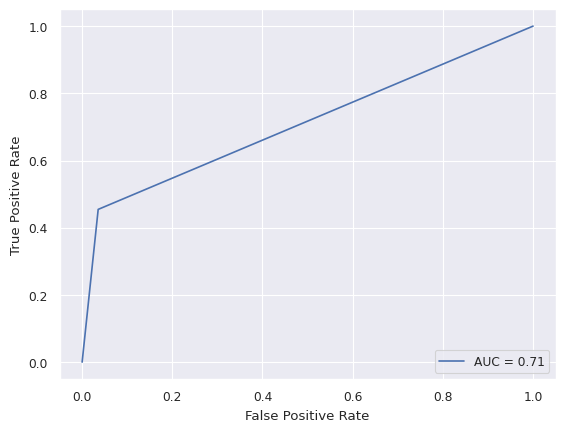

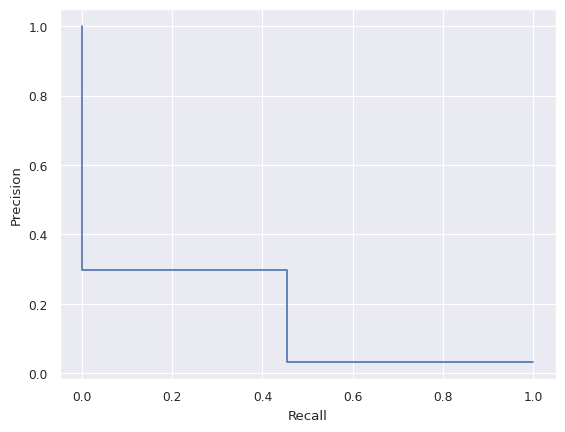

In [59]:
from sklearn.metrics import precision_recall_curve, PrecisionRecallDisplay,roc_curve,auc,RocCurveDisplay
# ROC curve
fpr_pca_ib, tpr_pca_ib, thresholds_pca_ib = roc_curve(y_test_ib, y_pred_pca_ib)
roc_auc_pca_ib = auc(fpr_pca_ib, tpr_pca_ib)
roc_display_pca_ib = RocCurveDisplay(fpr=fpr_pca_ib, tpr=tpr_pca_ib, roc_auc=roc_auc_pca_ib)
roc_display_pca_ib.plot()


# PR Curve
from sklearn.metrics import precision_recall_curve, PrecisionRecallDisplay
precision_pca_ib, recall_pca_ib, thresholds_pca_ib = precision_recall_curve(y_test_ib,y_pred_pca_ib)
pr_display_pca_ib = PrecisionRecallDisplay(precision=precision_pca_ib, recall=recall_pca_ib)
pr_display_pca_ib.plot()

##**PCA+RF+NN with SMOTE**

In [60]:
n_components = 30
pca30pc = PCA(n_components)
pca30pc.fit(X_train)

PCA(n_components=30)

Text(0, 0.5, 'Explained variance')

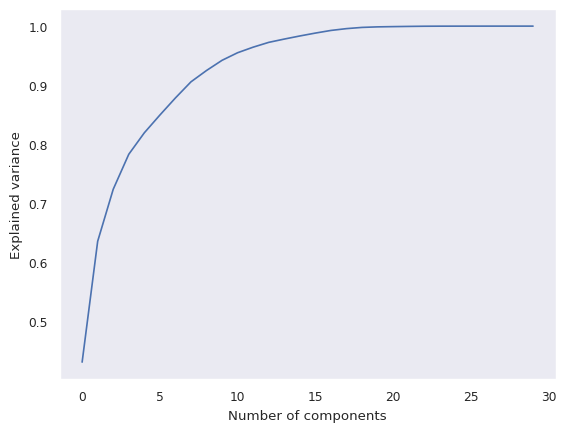

In [61]:
plt.grid()
plt.plot(np.cumsum(pca30pc.explained_variance_ratio_))
plt.xlabel('Number of components')
plt.ylabel('Explained variance')

In [62]:
# pca_30 = PCA(n_components = 0.95)
# pca_30.fit(X_train)
# print("Cumulative Variances (Percentage):")
# print(np.cumsum(pca_30.explained_variance_ratio_ * 100))
# components = len(pca_30.explained_variance_ratio_)
# print(f'Number of components: {components}')

In [63]:
num_pca_modes =11
pca30pc = PCA(n_components=num_pca_modes)
pca30pc.fit(X_train)

#pca90pc_comp  = abs(pca90pc.components_)
#print(pca90pc_comp)

X_train_red = pca30pc.transform(X_train)

print("Train images shape:", X_train_red.shape)

Train images shape: (9238, 11)


In [64]:
CBP_PCA = Sequential([keras.Input(shape=(num_pca_modes)),
                     Dense(50,activation="relu"),
                     Dense(30,activation="relu"),
                     Dense(20,activation="relu"),
                     Dense(1,activation="sigmoid")
                     ])

CBP_PCA.compile(optimizer="Adam",
                loss = "BinaryCrossentropy",
                metrics = "Accuracy")

CBP_PCA.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 50)                600       
                                                                 
 dense_9 (Dense)             (None, 30)                1530      
                                                                 
 dense_10 (Dense)            (None, 20)                620       
                                                                 
 dense_11 (Dense)            (None, 1)                 21        
                                                                 
Total params: 2,771
Trainable params: 2,771
Non-trainable params: 0
_________________________________________________________________


In [65]:
weights_pca = {0:1, 1:1}
history_pca = CBP_PCA.fit(X_train_red,y_train, epochs=50, class_weight=weights_pca)

Epoch 1/50
289/289 [==============================] - 5s 6ms/step - loss: 0.3245 - Accuracy: 0.8714
Epoch 2/50
289/289 [==============================] - 1s 4ms/step - loss: 0.2692 - Accuracy: 0.8872
Epoch 3/50
289/289 [==============================] - 1s 4ms/step - loss: 0.2471 - Accuracy: 0.8946
Epoch 4/50
289/289 [==============================] - 1s 4ms/step - loss: 0.2282 - Accuracy: 0.9065
Epoch 5/50
289/289 [==============================] - 1s 4ms/step - loss: 0.2124 - Accuracy: 0.9125
Epoch 6/50
289/289 [==============================] - 1s 4ms/step - loss: 0.1975 - Accuracy: 0.9209
Epoch 7/50
289/289 [==============================] - 1s 4ms/step - loss: 0.1867 - Accuracy: 0.9249
Epoch 8/50
289/289 [==============================] - 1s 4ms/step - loss: 0.1742 - Accuracy: 0.9330
Epoch 9/50
289/289 [==============================] - 1s 4ms/step - loss: 0.1655 - Accuracy: 0.9360
Epoch 10/50
289/289 [==============================] - 1s 4ms/step - loss: 0.1561 - Accuracy: 0.9404

In [66]:
print(X_test.shape)
X_test_red = pca30pc.transform(X_test)
y_pred_pca = CBP_PCA.predict(X_test_red)

y_pred_pca = y_pred_pca.reshape(3960)
y_pred_pca[y_pred_pca > 0.5] = 1
y_pred_pca[y_pred_pca <= 0.5] = 0

print(y_pred_pca.shape)
print(y_test.shape)

# Print f1, precision, and recall scores
print("precision:", precision_score(y_test, y_pred_pca , average="macro"))
print("Recall:", recall_score(y_test, y_pred_pca , average="macro"))
print("F1_score:", f1_score(y_test, y_pred_pca, average="macro"))

(3960, 30)
124/124 [==============================] - 0s 1ms/step
(3960,)
(3960,)
precision: 0.9713729899633929
Recall: 0.9707160859033603
F1_score: 0.9709296962727774


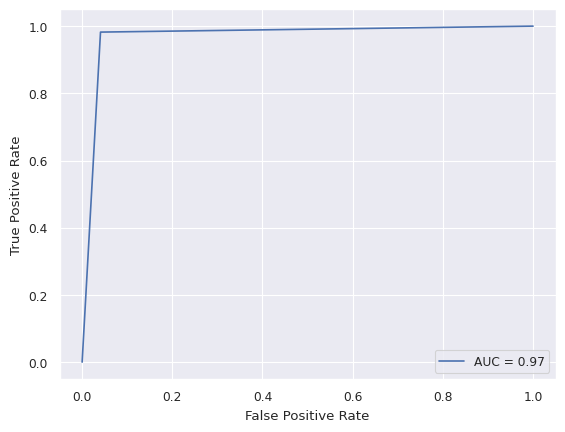

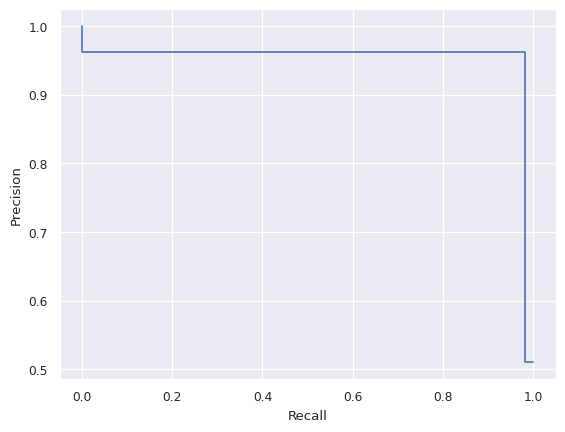

In [67]:
from sklearn.metrics import precision_recall_curve, PrecisionRecallDisplay,roc_curve,auc,RocCurveDisplay
# ROC curve
fpr_pca, tpr_pca, thresholds_pca = roc_curve(y_test, y_pred_pca)
roc_auc_pca = auc(fpr_pca, tpr_pca)
roc_display_pca = RocCurveDisplay(fpr=fpr_pca, tpr=tpr_pca, roc_auc=roc_auc_pca)
roc_display_pca.plot()


# PR Curve
from sklearn.metrics import precision_recall_curve, PrecisionRecallDisplay
precision_pca, recall_pca, thresholds_pca = precision_recall_curve(y_test,y_pred_pca)
pr_display_pca = PrecisionRecallDisplay(precision=precision_pca, recall=recall_pca)
pr_display_pca.plot()

##**Top features**

In [68]:
pca30pc.get_feature_names_out(input_features=None)

array(['pca0', 'pca1', 'pca2', 'pca3', 'pca4', 'pca5', 'pca6', 'pca7',
       'pca8', 'pca9', 'pca10'], dtype=object)

In [69]:
PCAs = []
for i in range(1,12):
    component_name = f"PC{i}"
    PCAs.append(component_name)

In [70]:
PC_df = pd.DataFrame(pca30pc.components_)
PC_df = PC_df.T
PC_df.columns = PCAs


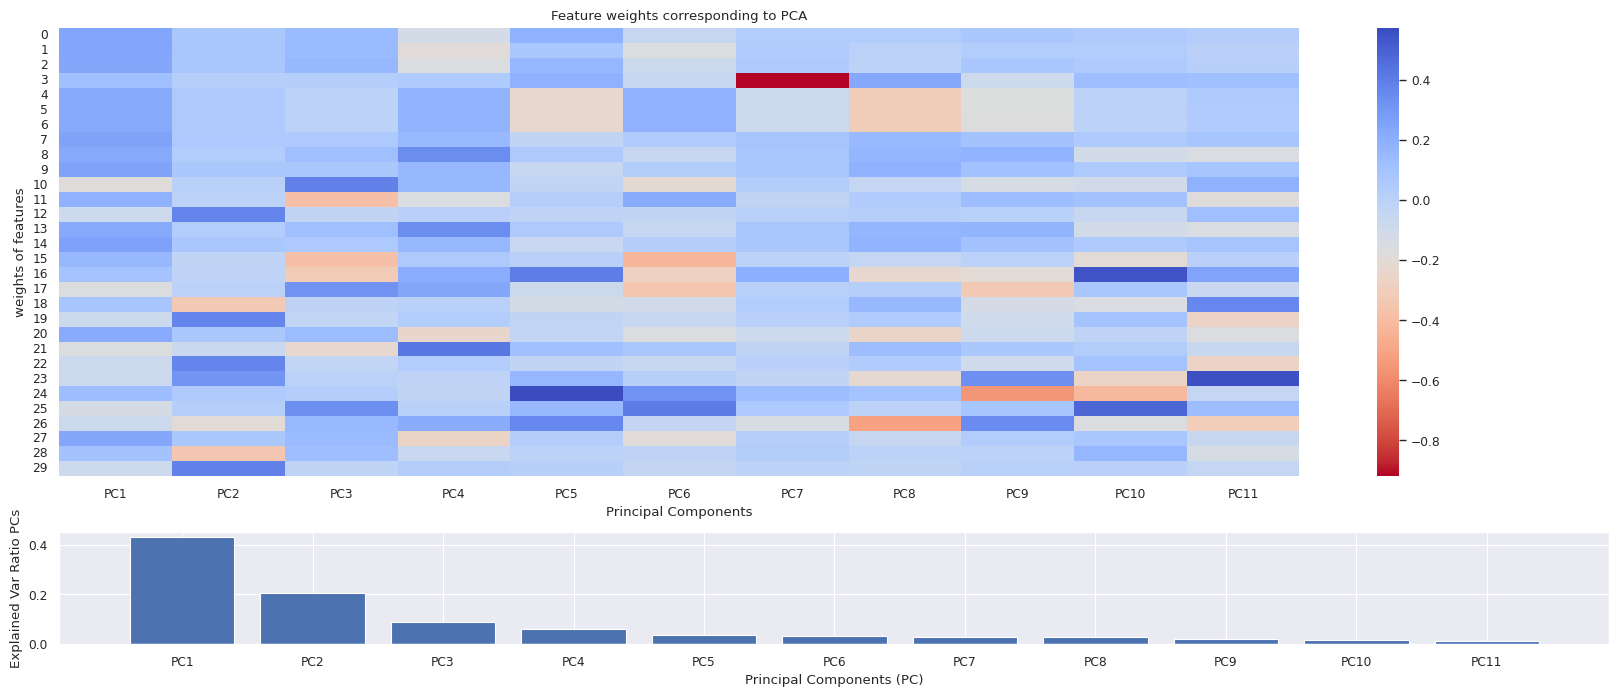

In [71]:
fig, ax = plt.subplots(2, 1, figsize=(20,8), gridspec_kw={'height_ratios':[4,1]})
sns.heatmap(PC_df,ax = ax[0], cmap='coolwarm_r')
ax[0].set_xlabel('Principal Components')
ax[0].set_ylabel('weights of features')
ax[0].set_title('Feature weights corresponding to PCA')

ax[1].bar(PCAs, pca30pc.explained_variance_ratio_)
ax[1].set_xlabel('Principal Components (PC)')
ax[1].set_ylabel('Explained Var Ratio PCs')
plt.show()

In [72]:
Total_var = pca30pc.explained_variance_ratio_.sum()
print('Total variance captured by the PCs is %.2f' %Total_var)

Total variance captured by the PCs is 0.95


In [73]:
PC_feature_names = []
PC_feature_weights = []
for PC in PCAs:
    dominant_features = np.abs(PC_df[PC]).sort_values(ascending = False)[:5]
    for i in dominant_features.index:
        PC_feature_weights.append(PC_df[PC][i])
    for i in dominant_features.index:
        PC_feature_names.append(X.columns[i]) 

In [77]:
PCA_df = []
for i in range(1,num_pca_modes+1):
    com_df_name = f"PC{i}_df"
    PCA_df.append(com_df_name)

for i in np.arange(1, 15, 5):
     PCA_df[int(i/5)]= pd.DataFrame(zip(PC_feature_names[i:i+5], PC_feature_weights[i:i+5]), columns = ['Feature names',  PCA_df[int(i/5)]])


PC_DF = PCA_df[0]
for i in np.arange(1, 3):
    PC_DF = PC_DF.merge(PCA_df[i], on='Feature names', how='outer')
PC_DF = PC_DF.fillna(0).set_index('Feature names')

In [78]:
print(PC_DF.shape)

(15, 3)


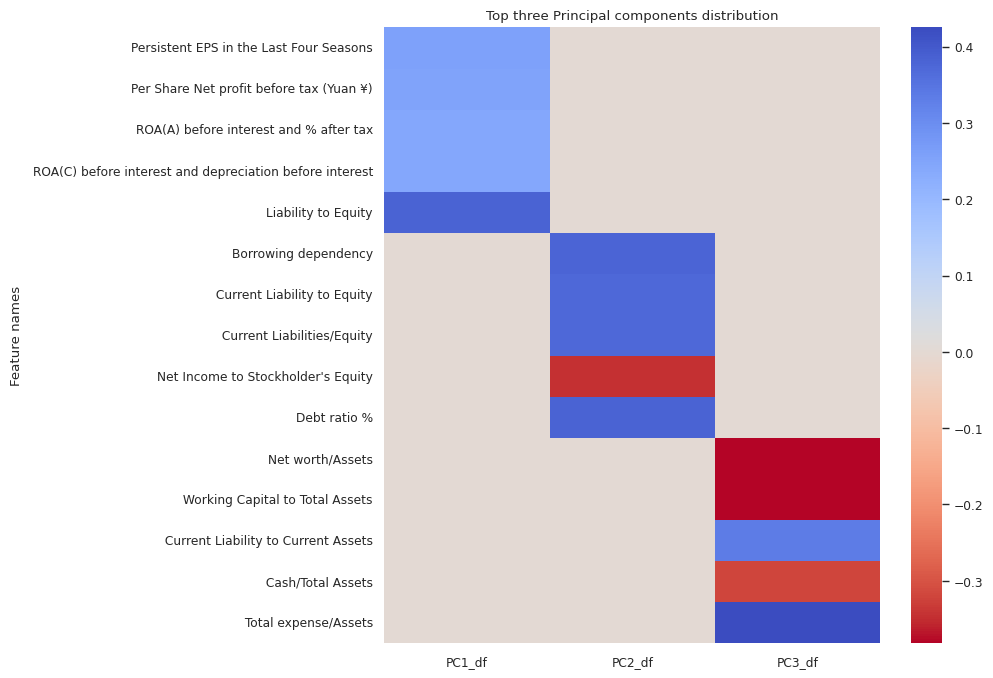

In [79]:
plt.figure(figsize=(8,8))
sns.heatmap(PC_DF, cmap='coolwarm_r')
plt.title('Top three Principal components distribution')
plt.show()